In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
#Constants for the Code

V2 = 0
V3 = 256000 #Newtons
E_al = 10.5 *10**3* 6.89476 *10**6 #Pa #Youngs Modulus of aluminium, the material of stringer
#0.020 − 0.062𝑖𝑛 thickness range for the “L” direction
R = 1.95 #m #Distance from origion to LE
A_s = 150 * (1/1000)**2 #m^2 #Stringer Area
t = 2.95/1000 #m #Thickness
c = 8*R #Chord

print("E_al 2024-T861:", E_al/(10**9), "GPa")

x2i = np.array([
    7*R,
    R,
    0,
    -R,
    -2*R/3,
    R
])

x3i = np.array([
    0,
    6/7*R,
    R,
    0,
    -R/3,
    -6*R/23
])

len = np.size(x2i)

x2c = (7*R -2*R/3 + R)/6
x3c = (6/7*R + R - R/3 - 6*R/23)/6

print('x2c: ', x2c)
print('x3c: ', x3c)

print(x2c/R, x3c/R)

x2i_c = x2i-x2c
x3i_c = x3i-x3c

H22c = 0
H33c = 0
H23c = 0

for i in range(len):
    #print(x2i[i])
    H22c += E_al*A_s*(x3i_c[i])**2
    H23c += E_al*A_s*(x3i_c[i])*(x2i_c[i])
    H33c += E_al*A_s*(x2i_c[i])**2
#This method is faster and only yields errors in the float, ie e-15

print("H22c: ", H22c)
print("H23c: ", H23c)
print("H33c: ", H33c)

del_fi = np.array([]) #shear flow due to the presence of stringers, i

for i in range(len):
    shearflowinx2 = x2i_c[i]*(H22c*V2 - H23c*V3)/(H22c*H33c - (H23c)**2)
    shearflowinx3 = x3i_c[i]*(H23c*V2 - H33c*V3)/(H22c*H33c - (H23c)**2)

    calc = -E_al*A_s*( shearflowinx2 - shearflowinx3)
    del_fi = np.append(del_fi, calc)
#print(del_fi)

#We make a cut along 12
#therefore, our shearflow in the skin calcs start at cut = 1

cut = 1
f_ij = np.zeros(len)
f_ij[cut-1] = 0

for i in range(cut,len):
    if(i+1>5):
        print("here",f_ij[i-cut])
        
        print("here index",i)
        f_ij[i] = f_ij[i-cut] + del_fi[0]#f_61 = f_56 + del_f(1)
        print("here shear flow: ", f_ij[i])
    else:
        
        f_ij[i] = f_ij[i-cut] + del_fi[i+1] #f_23 = f_12 + del_fi(2)

print("Open Shear Flow for skin sections, 12-61 \n",f_ij)



    


E_al 2024-T861: 72.39498 GPa
x2c:  2.3833333333333333
x3c:  0.410455486542443
1.2222222222222223 0.21048999309868874
H22c:  68050584.36934105
H23c:  -29940944.958260868
H33c:  1795449800.235
here 42436.3638873343
here index 5
here shear flow:  51595.98164891336
Open Shear Flow for skin sections, 12-61 
 [     0.         -61721.914884   -41856.40477626   4312.75596654
  42436.36388733  51595.98164891]


Now time to calculate the distance between stringers

To do this, We will look at x2i and x23, given these points we can find the distance according to the following.

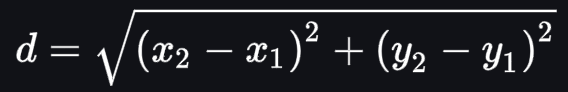

In [ ]:
#Closing Shear Flow calculations

#print(x2i)
#print(x3i)

l = np.zeros(len)

#Shape of length array
#Length of segments([1_2,2_3,3_4,4_5,5_6,6_1])
#Segments 3_4 and 4_5 are circular to make the leading edge of the airfoil
#the rest are linear
for i in range(len-1):
    if (i == 2):
        l[i] = np.pi * np.abs(x3i[i]-x3i[i+1]) #R 
    if (i == 3): #These 2 if statements cover the circular radii that create the leading edge.
        l[i] = np.pi * np.abs(x2i[i]-x2i[i+1]) #R/3 
    else:
        l[i] = np.sqrt((x2i[i+1] - x2i[i])**2 + (x3i[i+1] - x3i[i])**2)
    
    #To get the last distance to close out polygon
    print(i)
    l[i+1] = np.sqrt((x2i[i+1] - x2i[0])**2 + (x3i[i+1] - x3i[0])**2)

#I think this might be a use case for linked list but I am not a CS major so I don't care

perimeter = np.sum(l)
#print(perimeter)

#print(l_i)

#Now to calcualte CLosing shear flow
#Notice that this is just the dot product betwen open shear flow and segement length
f_c = -np.dot(f_ij, l)/perimeter

0
1
2
3
4
-15322.001487224752
-15322.00148722475


Now comes time for the area calculations,

The area of a traingle can be beautifully represented by the determinant of a matrix following

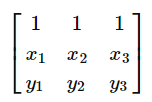

The full cacluation is the following,

$$A_{ijk} = \frac{1}{2} \cdot \left|{ \text{Determinant}}\right|$$

In [141]:
#Area code
ones = np.ones(3)

def tri_area(x1,x2,y1,y2):#x0 and y0 are ALWAYS the origin, they will always be 0
    x = np.array([x1,x2,0])
    y = np.array([y1,y2,0])

    A = np.vstack((ones,x,y))
    Area = 1/2 * np.abs(np.linalg.det(A))
    return Area
Area_A = tri_area(-1,9,5,2)
#print(B)
#print(Area_A)
#print(tri_area(6,9,-1,2))

#The above checks complete the area code

x2i = np.array([
    7*R,
    R,
    0,
    -R,
    -2*R/3,
    R
])

x3i = np.array([
    0,
    6/7*R,
    R,
    0,
    -R/3,
    -6*R/23
])

#For implementation
A_i = np.array([])
#print(A_i)
for i in range(len):
    if (i < len-1):
        print(i)
        print(x2i[i])
        print(x3i[i])
        A_i = np.append(A_i,tri_area(x2i[i],x2i[i+1],x3i[i],x3i[i+1]))
    else:#The final case where we consider points 6_1
        print('Here')
        print(i)
        A_i = np.append(A_i,tri_area(x2i[i],x2i[0],x3i[i],x3i[0]))
print(A_i)


0
13.65
0.0
1
1.95
1.6714285714285713
2
0.0
1.95
3
-1.95
0.0
4
-1.3
-0.65
Here
5
[11.4075      1.90125     1.90125     0.63375     0.96440217  3.47184783]
